In [1]:
%matplotlib inline

# Compute Moran\'s I score

This example shows how to compute the Moran\'s I global spatial
auto-correlation statistics.

The Moran\'s I global spatial auto-correlation statistics evaluates
whether features (i.e. genes) shows a pattern that is clustered,
dispersed or random in the tissue are under consideration.

::: seealso
-   See `sphx_glr_auto_examples_graph_compute_co_occurrence.py` and
    `sphx_glr_auto_examples_graph_compute_ripley.py` for other scores to
    describe spatial patterns.
-   See `sphx_glr_auto_examples_graph_compute_spatial_neighbors.py` for
    general usage of `squidpy.gr.spatial_neighbors`.
:::


In [1]:
import squidpy as sq

adata = sq.datasets.visium_hne_adata()
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

We can compute the Moran\'s I score with `squidpy.gr.spatial_autocorr`
and `mode = 'moran'`. We first need to compute a spatial graph with
`squidpy.gr.spatial_neighbors`. We will also subset the number of genes
to evaluate.


In [3]:
genes = adata[:, adata.var.highly_variable].var_names.values[:100]
sq.gr.spatial_neighbors(adata)
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    genes=genes,
    n_perms=100,
    n_jobs=1,
)
adata.uns["moranI"].head(10)

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.72/s]


,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
3110035E14Rik,0.665132,0.0,0.000131,0.0,0.009901,0.000289,0.0,0.0,0.012074
Resp18,0.649582,0.0,0.000131,0.0,0.009901,0.000229,0.0,0.0,0.012074
1500015O10Rik,0.605940,0.0,0.000131,0.0,0.009901,0.000181,0.0,0.0,0.012074
Ecel1,0.570304,0.0,0.000131,0.0,0.009901,0.000239,0.0,0.0,0.012074
2010300C02Rik,0.539469,0.0,0.000131,0.0,0.009901,0.000250,0.0,0.0,0.012074
Scg2,0.476060,0.0,0.000131,0.0,0.009901,0.000211,0.0,0.0,0.012074
Ogfrl1,0.457945,0.0,0.000131,0.0,0.009901,0.000224,0.0,0.0,0.012074
Itm2c,0.451842,0.0,0.000131,0.0,0.009901,0.000178,0.0,0.0,0.012074
Tuba4a,0.451810,0.0,0.000131,0.0,0.009901,0.000161,0.0,0.0,0.012074
Satb2,0.429162,0.0,0.000131,0.0,0.009901,0.000173,0.0,0.0,0.012074


We can visualize some of those genes with `squidpy.pl.spatial_scatter`.


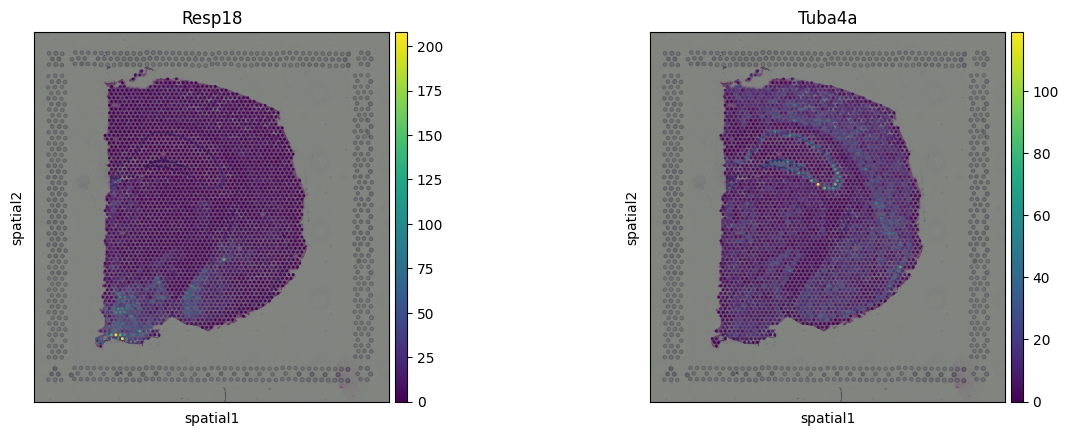

In [4]:
sq.pl.spatial_scatter(adata, color=["Resp18", "Tuba4a"])

We could\'ve also passed `mode = 'geary'` to compute a closely related
auto-correlation statistic, [Geary\'s
C](https://en.wikipedia.org/wiki/Geary%27s_C). See
`squidpy.gr.spatial_autocorr` for more information.


In [8]:
sq.gr.spatial_autocorr(adata, 
                       mode='geary', 
                       genes=genes, 
                       n_perms=100, 
                       n_jobs=5)
adata.uns['gearyC'].head(10)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 51.91/s]


,C,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
3110035E14Rik,0.332991,0.000000e+00,0.000131,0.000000e+00,0.009901,0.000243,0.000000e+00,0.000000e+00,0.011929
Resp18,0.348337,0.000000e+00,0.000131,0.000000e+00,0.009901,0.000268,0.000000e+00,0.000000e+00,0.011929
1500015O10Rik,0.385679,0.000000e+00,0.000131,3.574607e-308,0.009901,0.000260,0.000000e+00,7.149213e-307,0.011929
Ecel1,0.432746,0.000000e+00,0.000131,0.000000e+00,0.009901,0.000223,0.000000e+00,0.000000e+00,0.011929
2010300C02Rik,0.461301,0.000000e+00,0.000131,8.716495e-266,0.009901,0.000238,0.000000e+00,1.452749e-264,0.011929
Scg2,0.521210,0.000000e+00,0.000131,1.210563e-215,0.009901,0.000234,0.000000e+00,1.100512e-214,0.011929
Ogfrl1,0.537278,0.000000e+00,0.000131,8.601235e-202,0.009901,0.000228,0.000000e+00,6.616335e-201,0.011929
Tuba4a,0.545983,0.000000e+00,0.000131,5.699111e-229,0.009901,0.000193,0.000000e+00,5.699111e-228,0.011929
Itm2c,0.546298,0.000000e+00,0.000131,1.055148e-197,0.009901,0.000227,0.000000e+00,7.536772e-197,0.011929
Satb2,0.570301,2.176579e-309,0.000131,1.780203e-240,0.009901,0.000170,2.176579e-308,2.225254e-239,0.011929


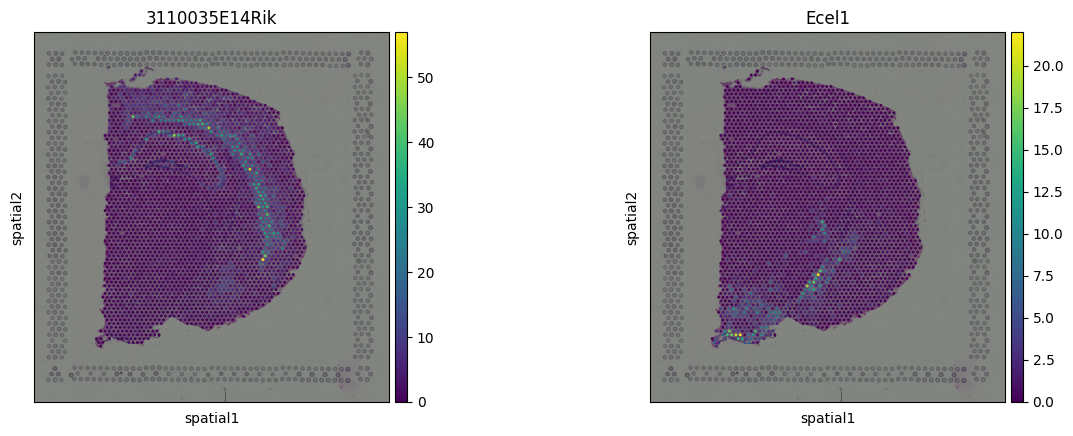

In [3]:
sq.pl.spatial_scatter(adata, color=["3110035E14Rik", "Ecel1"])

> IDF: As we can see, Moran's I and Geary's C return similar gene autocorrelation ranks. It is important to remember the difference between these two statistics and the fact that Geary's C is more sensitive to local spatial autocorrelation than Moran's I